In [1]:
import numpy as np
import torch
from torch import nn
import random
import matplotlib.pyplot as plt

device = 'cuda'

XOR_DATA = [[0, 0], [1, 0], [0, 1], [1, 1]]
XOR_TARGETS = [[0], [1], [1], [0]]

X = torch.tensor(XOR_DATA, dtype=torch.float32).to(device)
Y = torch.tensor(XOR_TARGETS, dtype=torch.float32).to(device)


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(2, 2, bias=True),
            nn.Sigmoid(),
            nn.Linear(2, 1, bias=True),
            nn.Sigmoid()
        ).to(device)

    def forward(self, x):
        return self.layers(x)


def norm(vec):
    return torch.nn.functional.normalize(vec, p=2, dim=1)


def mag(vec):
    return vec.norm(p=2, dim=1, keepdim=True)


torch.manual_seed(42)
#trainloader = torch.utils.data.DataLoader(list(zip(X, Y)), batch_size=1)
#mlp = MLP()
#
#loss_function = nn.MSELoss().to(device)
#optimizer = torch.optim.SGD(mlp.parameters(), lr=0.1)
#
#for epoch in range(0, 10000):
#    current_loss = 0.0
#    for i, data in enumerate(trainloader, 0):
#        inputs, targets = data
#        optimizer.zero_grad()
#        outputs = mlp(inputs)
#        loss = loss_function(outputs, targets)
#        loss.backward()
#        optimizer.step()
#        current_loss += loss.item()
#
#print(mlp.forward(X))
#print('Training process has finished')

tensor([0.1055, 0.2889, 0.1017, 0.2940, 0.0979, 0.2987, 0.1067, 0.2895, 0.0994,
        0.2926, 0.1021, 0.2993, 0.1036, 0.3007, 0.1021, 0.2994, 0.0939, 0.2962,
        0.1076, 0.2981], device='cuda:0', grad_fn=<SqueezeBackward4>)
tensor([ 7.7541, 21.2295,  7.4702, 21.6003,  7.1940, 21.9503,  7.8413, 21.2719,
         7.3018, 21.4990,  7.4991, 21.9910,  7.6111, 22.0929,  7.5006, 21.9964,
         6.9006, 21.7610,  7.9047, 21.9039], device='cuda:0',
       grad_fn=<MulBackward0>)
tensor([ 7.7541, 21.2295,  7.4702, 21.6003,  7.1940, 21.9503,  7.8413, 21.2719,
         7.3018, 21.4990,  7.4991, 21.9910,  7.6111, 22.0929,  7.5006, 21.9964,
         6.9006, 21.7610,  7.9047, 21.9039])
tensor([ 8.0937, 22.1593,  7.7973, 22.5464,  7.5091, 22.9117,  8.1847, 22.2036,
         7.6215, 22.4406,  7.8275, 22.9542,  7.9445, 23.0605,  7.8291, 22.9598,
         7.2029, 22.7141,  8.2509, 22.8633])
tensor([ 8.0518, 22.0445,  7.7570, 22.4295,  7.4701, 22.7930,  8.1423, 22.0886,
         7.5821, 22.3244,  

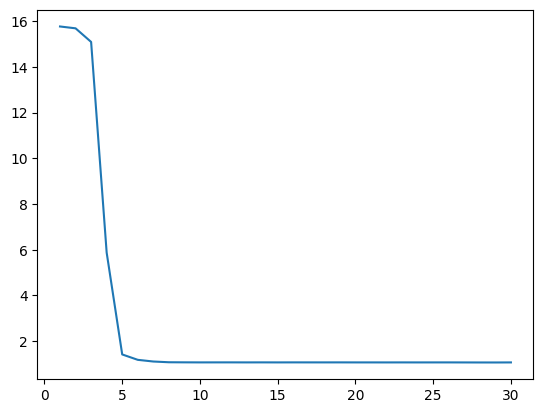

In [20]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = torch.nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 2, bias=False),
            nn.LeakyReLU(),
            nn.Linear(2, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 20, bias=False)
        ).to(device)

    def forward(self, x):
        return self.layers(x)


class AETrainer():
    def __init__(self, model):
        self.model = model

    def train(self, training_data):
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=1, shuffle=True)
        loss_function = nn.L1Loss(reduction='sum').to(device)
        optimizer = torch.optim.SGD(self.model.parameters(), lr=0.001)
        losses = []
        for epoch in range(0, 30):
            epoch_loss = []
            for i, data in enumerate(train_loader, 0):
                inputs, targets = data
                optimizer.zero_grad()
                inputs = norm(inputs)
                targets = torch.nn.functional.normalize(targets, p=2, dim=1)
                outputs = self.model(inputs)
                loss = loss_function(outputs, targets) * loss_function(outputs, targets)
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())
            losses.append(sum(epoch_loss) / len(epoch_loss))
        return losses

    def model(self):
        return self.model()


X = (5, 10)
Y = (20, 25)


def my_plot(epochs, loss):
    plt.plot(epochs, loss)


training_samples = []
validation_data = []
outlier_data_set = []
for i in range(1000):
    training_samples.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

transformed_data = []
t_validation_data = []
t_outlier_data = []

for i in range(200):
    validation_data.append([random.uniform(X[0], X[1]), random.uniform(Y[0], Y[1])])

for i in range(50):
    outlier_data_set.append([random.uniform(11, 1500), random.uniform(26, 1500)])

for i in range(50):
    outlier_data_set.append([random.uniform(-1500, 4), random.uniform(-1500, 19)])

for i in range(0, 1000, 10):
    sample = training_samples[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    transformed_data.append(t_data)

for i in range(0, 200, 10):
    sample = validation_data[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    t_validation_data.append(t_data)

for i in range(0, 100, 10):
    sample = outlier_data_set[i:i + 10]
    t_data = []
    for x, y in sample:
        t_data.append(x)
        t_data.append(y)
    t_outlier_data.append(t_data)

mixin_training = transformed_data + t_outlier_data
transformed_data = torch.tensor(transformed_data, dtype=torch.float32).to(device)
t_validation_data = torch.tensor(t_validation_data, dtype=torch.float32).to(device)
t_outlier_data = torch.tensor(t_outlier_data, dtype=torch.float32).to(device)
mixin_training = torch.tensor(mixin_training, dtype=torch.float32).to(device)

ae = AutoEncoder()
ae_trainer = AETrainer(ae)
losses = ae_trainer.train(mixin_training)
my_plot(np.linspace(1, 30, 30).astype(int), losses)
b = transformed_data[0]
#print(b)


#print(torch.nn.functional.normalize(transformed_data[0],p=2, dim=0) * transformed_data[0].norm(p=2, dim=0, keepdim=True))
#print(torch.nn.functional.normalize(transformed_data[0],p=2, dim=0))
a = ae.forward(torch.nn.functional.normalize(transformed_data[0], p=2, dim=0))
print(a)
print(a * transformed_data[0].norm(p=2, dim=0, keepdim=True))
#print(transformed_data[0])

second_x = []
second_y = []
for d in mixin_training:
    s = ae.forward(torch.nn.functional.normalize(d, p=2, dim=0)).cpu().detach()
    s = s * d.norm(p=2, dim=0, keepdim=True).cpu()
    print(s)
    for i in range(0, 20, 2):
        second_x.append(s[i])
        second_y.append(s[i + 1])


#print(second_y)
#print(second_x)

[[5.531133914250679, 20.30738495559947], [9.88857937229646, 22.38508893968737], [6.56281365755266, 21.882537904523765], [8.207399435883868, 20.165622718121305], [6.967560002754471, 23.812376043562832], [9.60436461784315, 23.59016948139192], [9.96881009728534, 21.251216619809377], [7.060034361844442, 23.36680022772141], [6.326545554318109, 21.116832413970084], [5.878735587358513, 20.717112813723993], [5.520536778567156, 23.584017698505505], [6.080633269920679, 21.338383902944003], [9.042484093431788, 20.431255919221364], [7.526530391505929, 20.676739925114145], [6.132181142367466, 21.733116129090796], [5.180769075996825, 23.36896729274198], [6.313098706391132, 24.632838194954687], [5.919202159735722, 23.16045817689438], [9.464445244042519, 23.54815969961727], [8.302759563112618, 24.01181081953724], [8.184662626746636, 20.834529772762032], [9.94337459934213, 23.77581952355232], [8.270988358208522, 20.604741383196636], [8.726574862020666, 21.307183895839124], [9.208448671039793, 20.394155

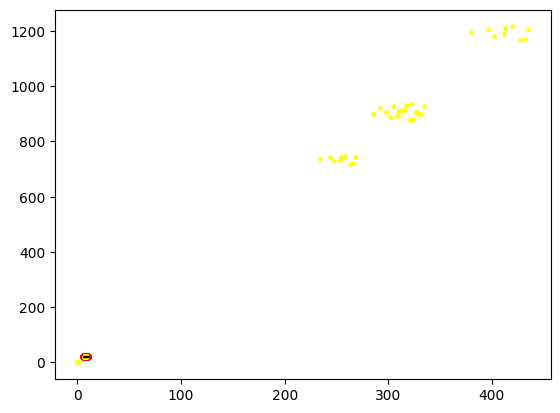

In [21]:
figure, axes = plt.subplots()
#axes.set(xlim=(5, 10), ylim=(20, 25))
uc_3 = plt.Rectangle((5, 20), 5, 5, fill=False)
print(training_samples)
new_x = []
new_y = []
for z in training_samples:
    new_x.append(z[0])
    new_y.append(z[1])
points_1 = plt.scatter(new_x,
                       new_y,
                       color="red", s=10)
points_2 = plt.scatter(second_x, second_y,
                       color="yellow", s=5)
axes.add_artist(uc_3)
plt.show()

[0.00014378584455698729, 0.0006604684749618173, 0.0006186459213495255, 0.0004975053598172963, 0.0004959552898071706, 7.816926881787367e-06, 0.00019441732729319483, 0.0010431020054966211, 0.0003713592595886439, 7.409229874610901e-05, 1.4768596656722366e-07, 8.263310883194208e-05, 0.00037676937063224614, 9.63154889177531e-05, 5.831568614667049e-06, 6.88079817336984e-05, 0.00024934523389674723, 9.809609036892653e-05, 7.744636241113767e-05, 0.00022407126380130649, 0.0007055316818878055, 6.086366920499131e-05, 3.0188875825842842e-05, 0.00021576325525529683, 0.00015246526163537055, 0.0006808683974668384, 0.0005813944735564291, 4.450572305358946e-05, 0.00010667328751878813, 1.4662895409855992e-05, 2.416859751974698e-05, 3.5343709896551445e-05, 6.324493369902484e-06, 6.9907487159071025e-06, 0.00018900178838521242, 6.0693917475873604e-05, 4.1925148252630606e-05, 4.023692667942669e-07, 4.91275277454406e-05, 2.0865641999989748e-05, 2.668740307854023e-06, 2.9813174478476867e-05, 1.332829128841695e

ValueError: x and y must have same first dimension, but have shapes (15,) and (50,)

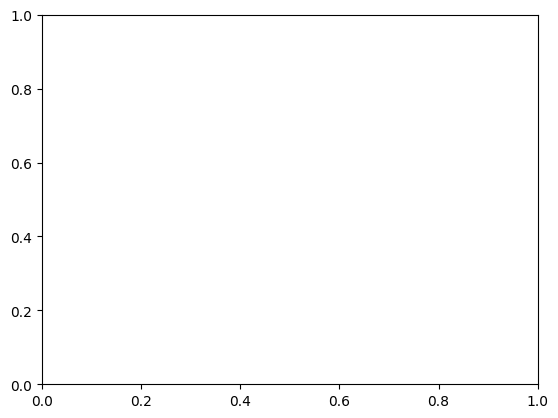

In [88]:
from numpy import sqrt, quantile


class DeepSVDD(nn.Module):
    def __init__(self, autoencoder):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(20, 20, bias=False),
            nn.LeakyReLU(),
            nn.Linear(20, 10, bias=False),
            nn.LeakyReLU(),
            nn.Linear(10, 2, bias=False)
        ).to(device)
        net_dict = self.state_dict()
        ae_dict = ae.state_dict()
        ae_dict = {k: v for k, v in ae_dict.items() if k in net_dict}
        net_dict.update(ae_dict)
        self.load_state_dict(net_dict)

    def forward(self, x):
        return self.layers(x)


# Trainer can train models for either soft-boundary Deep SVDD or One-Class Deep SVDD
class DeepSVDDTrainer:
    def __init__(self, model, goal, c_size):
        self.model = model
        self.goal = goal
        self.c = torch.tensor([0] * c_size, dtype=torch.float32, device=device)
        self.R = torch.tensor(0, dtype=torch.float32, device=device)

    def train(self, training_data):
        optimizer = torch.optim.Adam(dsvdd.parameters(), lr=0.0001)
        train_loader = torch.utils.data.DataLoader(list(zip(training_data, training_data)), batch_size=1)
        warmup_epoch = 5
        nu = 0.2

        losses = []

        for epoch in range(50):
            epoch_loss = []
            keks = []
            for data in train_loader:
                inputs, targets = data
                optimizer.zero_grad()
                outputs = dsvdd.forward(norm(inputs))
                dist = torch.sum((outputs - self.c) ** 2, dim=1)
                keks.append(dist.item())
                if self.goal == 'one-class':
                    loss = torch.mean(dist)
                else:
                    scores = dist - self.R ** 2
                    # Use default nu of 0.1 for now
                    loss = self.R ** 2 + (1 / nu) * torch.mean(torch.max(torch.zeros_like(scores), scores))
                loss.backward()
                optimizer.step()
                epoch_loss.append(loss.item())
            if epoch >= warmup_epoch and epoch % warmup_epoch == 0:
                print(keks)
                print(quantile(sqrt(keks), 1 - nu))
                self.R = torch.tensor(quantile(sqrt(keks), 1 - nu))
            losses.append(sum(epoch_loss) / len(epoch_loss))
        return losses

    def set_center(self, transformed_data):
        with torch.no_grad():
            for x in transformed_data:
                self.c += dsvdd.forward(torch.nn.functional.normalize(x, p=2, dim=0))

        self.c /= len(transformed_data)

    # First copy weights from autoencoder to DeepSVDD network


#mixin outliers with transformed data

dsvdd = DeepSVDD(ae)
dsvdd_trainer = DeepSVDDTrainer(dsvdd, 'soft-boundary', 2)
dsvdd_trainer.set_center(mixin_training)
losses = dsvdd_trainer.train(mixin_training)
my_plot(np.linspace(1, 15, 15).astype(int), losses)

tensor(0.0167, dtype=torch.float64)
tensor([ 0.6782, -0.1436], device='cuda:0')


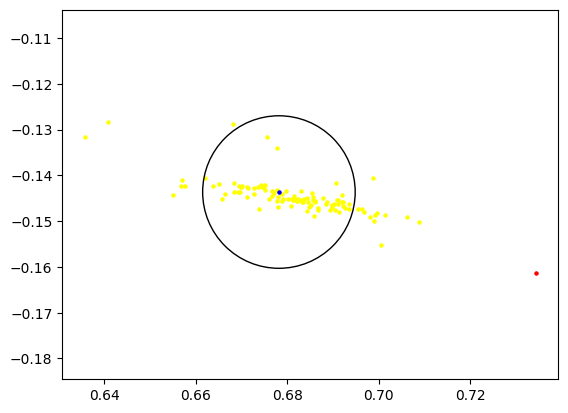

In [91]:
figure, axes = plt.subplots()
uc_3 = plt.Circle(dsvdd_trainer.c, dsvdd_trainer.R, fill=False)

new_x = []
new_y = []

print(dsvdd_trainer.R)
print(dsvdd_trainer.c)
for data in mixin_training:
    map = dsvdd.forward(torch.nn.functional.normalize(data, p=2, dim=0)).cpu().detach().numpy()
    new_x.append(map[0])
    new_y.append(map[1])

#print(mixin_training[-10:])
anomalous = transformed_data[0].cpu().detach().numpy()
#
anomalous[0] = random.random() * -20
anomalous[1] = random.random() * -15
anomalous = torch.tensor(anomalous, dtype=torch.float32, device=device)
an = dsvdd.forward(torch.nn.functional.normalize(anomalous, p=2, dim=0)).cpu().detach().numpy()
center = dsvdd_trainer.c.cpu().detach().numpy()
points_2 = plt.scatter(new_x, new_y,
                       color="yellow", s=5)
#print(new_x)
#print(new_y)
plt.scatter(an[0], an[1],
            color="red", s=5)
plt.scatter(center[0], center[1],
            color="blue", s=5)
#axes.add_artist(uc_3)
plt.gca().add_patch(uc_3)
plt.axis('equal')
plt.show()
